## Context
The market research team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill product offered by CardioGood Fitness. The market research team decides to investigate whether there are differences across the product lines with respect to customer characteristics. The team decides to collect data on individuals who purchased a treadmill at a CardioGood Fitness retail store at any time in the past three months. The data is stored in the CardioGoodFitness.csv file.

##Objective
Perform descriptive analysis to create a customer profile for each CardioGood Fitness treadmill product line.

##Data Dictionary
The team identified the following customer variables to study:

- Product: Product purchased - TM195, TM498, or TM798
- Gender: Male or Female
- Age: Age of the customer in years
- Education: Education of the customer in years
- MaritalStatus: Single or partnered
- Income: Annual household income
- Usage: The average number of times the customer plans to use the treadmill each week;
- Miles: The average number of miles the customer expects to walk/run each week;
- Fitness: Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is excellent shape.
##Questions to explore
- What are the different types of variables in the data?
- What is the distribution of different variables in the data?
- Which product is more popular among males or females?
- Is the product purchase affected by the marital status of the customer?
- Is there a significant correlation among some of the variables?
- What is the distribution of the average number of miles for each product?

Importing libraries to help with data visualisation

In [10]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

Importing customer database

In [11]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Useful Docs/Courses/MIT Applied Data Science/Week 1 - Python for Data Science/Practice Case Study/CardioGoodFitness.csv')
df.head(20).T

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Product,TM195,TM195,TM195,TM195,TM195,TM195,TM195,TM195,TM195,TM195,TM195,TM195,TM195,TM195,TM195,TM195,TM195,TM195,TM195,TM195
Age,18,19,19,19,20,20,21,21,21,21,22,22,22,22,23,23,23,23,23,23
Gender,Male,Male,Female,Male,Male,Female,Female,Male,Male,Female,Male,Female,Female,Female,Male,Male,Female,Male,Female,Female
Education,14,15,14,12,13,14,14,13,15,15,14,14,16,14,16,16,14,16,16,15
MaritalStatus,Single,Single,Partnered,Single,Partnered,Partnered,Partnered,Single,Single,Partnered,Single,Partnered,Single,Single,Partnered,Partnered,Single,Partnered,Single,Partnered
Usage,3,2,4,3,4,3,3,3,5,2,3,3,4,3,3,3,2,4,4,2
Fitness,4,3,3,3,2,3,3,3,4,3,3,2,3,3,1,3,3,3,3,2
Income,29562,31836,30699,32973,35247,32973,35247,32973,35247,37521,36384,35247,36384,35247,38658,40932,34110,39795,38658,34110
Miles,112,75,66,85,47,66,75,85,141,85,85,66,75,75,47,75,103,94,113,38


Get an info summary of the contents of customer data.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


###Return from previous .info() function answers the first question:
- What are the different types of variables in the data?
###Customer data contains 180 entries and a total of 9 variables:
- Product
- Age
- Gender
- Education
- MaritalStatus
- Usage
- Fitness
- Income
- Miles

###Using Seaport's histogram plot functions to answer the next question regarding the distribution of different variables.

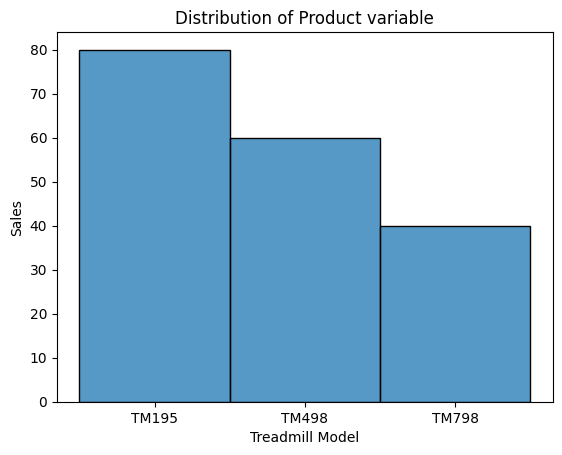

In [13]:
#Univariate distributions of different variables in the dataset
#Distribution of the "Product" variable:
plt.title("Distribution of Product variable")
plt.xlabel("Treadmill Model")
plt.ylabel("Sales")
sns.histplot(data=df, x="Product")
plt.show()

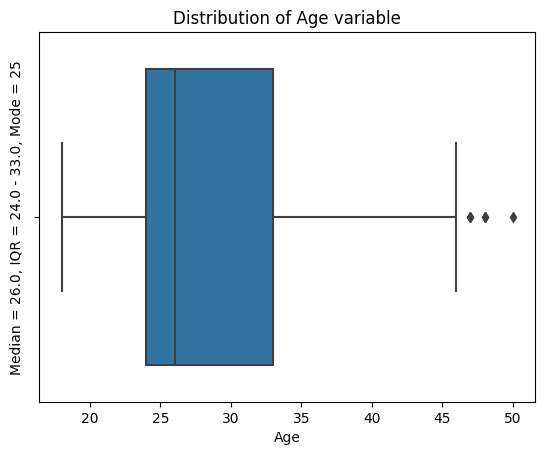

In [86]:
#Distribution of the "Age" variable:
plt.title("Distribution of Age variable")
plt.ylabel(f"Median = {df['Age'].median()}, IQR = {df['Age'].quantile(0.25)} - {df['Age'].quantile(0.75)}, Mode = {df['Age'].mode().iloc[0]}")
sns.boxplot(data=df, x="Age")
plt.show()

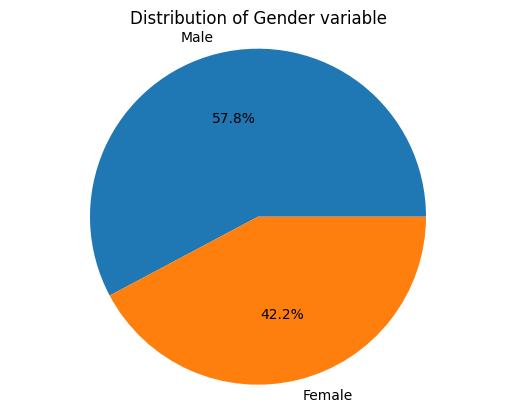

In [15]:
#Distribution of the "Gender" variable:
plt.title("Distribution of Gender variable")
# Calculate counts
gender_counts = df['Gender'].value_counts()

# Create a pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

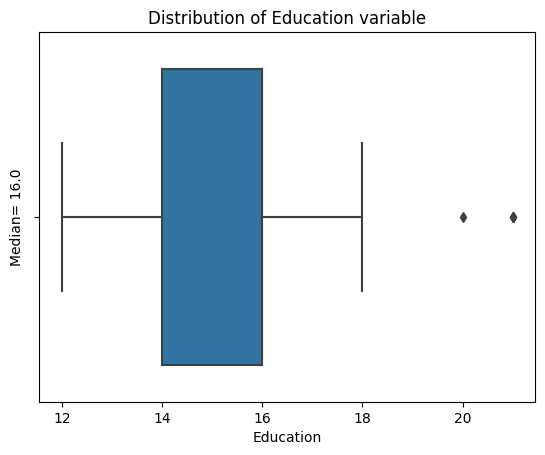

In [16]:
#Distribution of the "Education" variable:
plt.title("Distribution of Education variable")
sns.boxplot(data=df, x="Education")
plt.ylabel("Median= %s" % df["Education"].median())
plt.show()

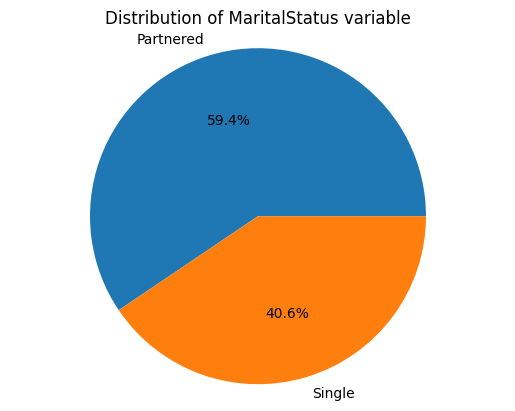

In [17]:
#Distribution of the "MaritalStatus" variable:
plt.title("Distribution of MaritalStatus variable")
# Calculate counts
ms_counts = df['MaritalStatus'].value_counts()

# Create a pie chart
plt.pie(ms_counts, labels=ms_counts.index, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

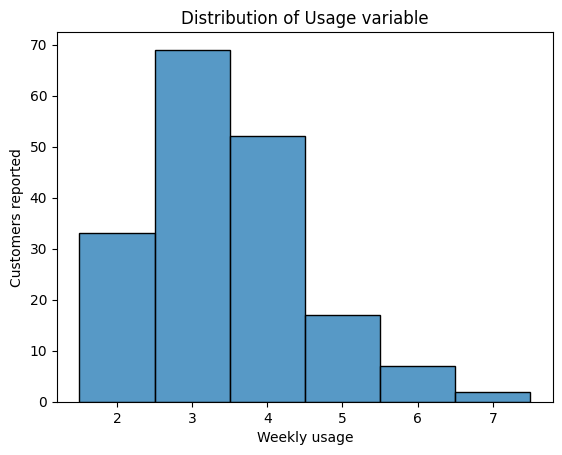

In [18]:
#Distribution of the "Usage" variable:
plt.title("Distribution of Usage variable")
sns.histplot(data=df, x="Usage", discrete=True)
plt.xlabel("Weekly usage")
plt.ylabel("Customers reported")
plt.show()

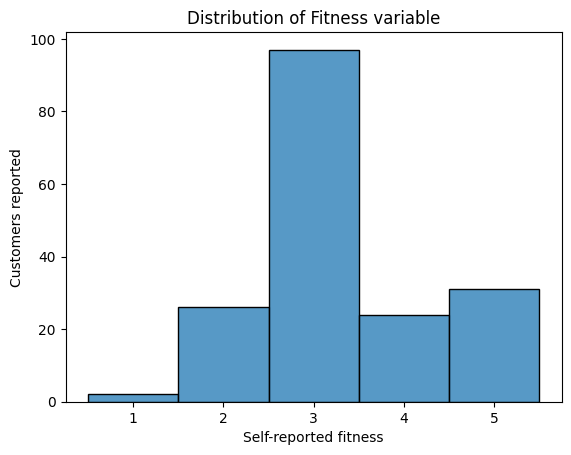

In [19]:
#Distribution of the "Fitness" variable:
plt.title("Distribution of Fitness variable")
sns.histplot(data=df, x="Fitness", bins=5, discrete=True)
plt.xlabel("Self-reported fitness")
plt.ylabel("Customers reported")
plt.show()

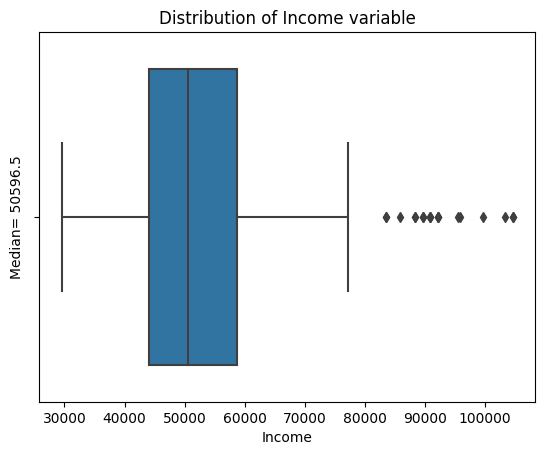

In [20]:
#Distribution of the "Income" variable:
plt.title("Distribution of Income variable")
sns.boxplot(data=df, x="Income")
plt.ylabel("Median= %s" % df["Income"].median())
plt.show()

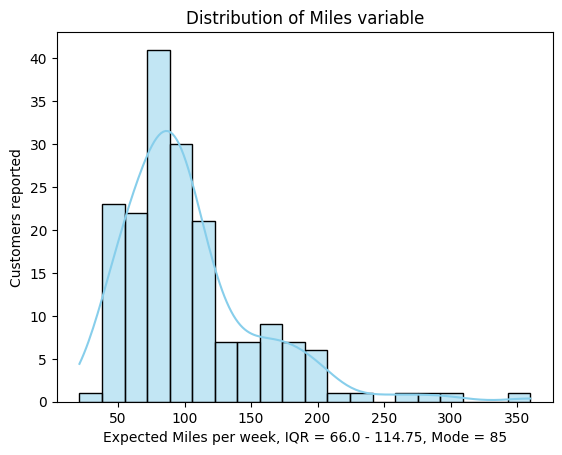

In [89]:
#Distribution of the "Miles" variable:
plt.title("Distribution of Miles variable")
# Create a histogram
sns.histplot(data=df, x="Miles", bins=20, kde=True, color="skyblue")
plt.xlabel("Expected Miles per week")
plt.xlabel(f"Expected Miles per week, IQR = {df['Miles'].quantile(0.25)} - {df['Miles'].quantile(0.75)}, Mode = {df['Miles'].mode().iloc[0]}")
plt.ylabel("Customers reported")
plt.show()

Answering the question:
- Which product is more popular among males or females?

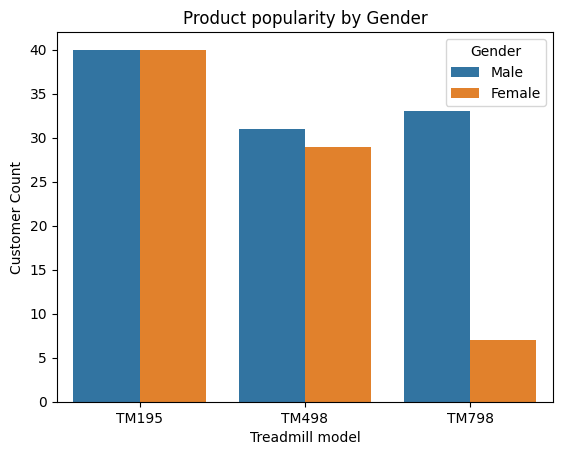

In [22]:
#Using a countplot with different hue for male and female subgroups
plt.title("Product popularity by Gender")
sns.countplot(data=df, x='Product', hue="Gender")
plt.xlabel("Treadmill model")
plt.ylabel("Customer Count")
plt.show()

###Answering the question:
- Is the product purchase affected by the marital status of the customer?

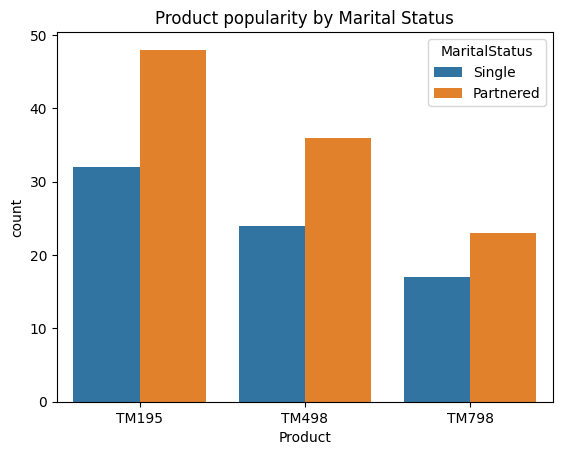

In [23]:
#Using a countplot with different hue for Partnered and Single subgroups
plt.title("Product popularity by Marital Status")
sns.countplot(data=df, x='Product', hue="MaritalStatus")
plt.show()

###Answering the question:
- Is there a significant correlation among some of the variables?
###A Heatmap is best to visualise the correlation between numeric variables


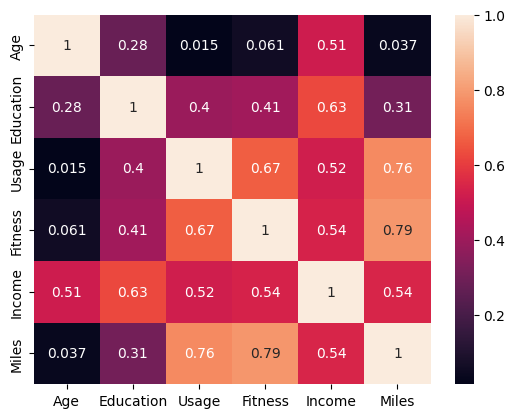

In [61]:
#Checking correlation between variable
sns.heatmap(df[["Product",
                     "Age",
                     "Gender",
                     "Education",
                     "MaritalStatus",
                     "Usage",
                     "Fitness",
                     "Income",
                     "Miles"]].corr(numeric_only=True), annot=True)
plt.show()

In [63]:
data=df[["Product",
        "Age",
        "Gender",
        "Education",
        "MaritalStatus",
        "Usage",
        "Fitness",
        "Income",
        "Miles"]].corr(numeric_only=True)
upper_right_entries = np.triu_indices(len(data), 1)
# Iterate through the upper triangle indices
for i, j in zip(*upper_right_entries):
    correlation_value = data.iloc[i, j]
    # Print if correlation is greater than 0.5
    if  (correlation_value) > 0.5:
      print(f"{data.columns[i]}_{data.columns[j]} = {correlation_value}")

Age_Income = 0.5134136851208337
Education_Income = 0.6258273463351699
Usage_Fitness = 0.668605568025629
Usage_Income = 0.5195372321137098
Usage_Miles = 0.7591304767293796
Fitness_Income = 0.5350053167686752
Fitness_Miles = 0.7857017433982374
Income_Miles = 0.54347325894583


###The following variables show medium correlation (>0.5):
- Age_Income = 0.5134136851208337
- Education_Income = 0.6258273463351699
- Usage_Fitness = 0.668605568025629
- Usage_Income = 0.5195372321137098
- Fitness_Income = 0.5350053167686752
- Income_Miles = 0.54347325894583
###The following variables show strong correlation (> 0.7):
- Usage_Miles = 0.7591304767293796
- Fitness_Miles = 0.7857017433982374

###Answering the question:
- What is the distribution of the average number of miles for each product?

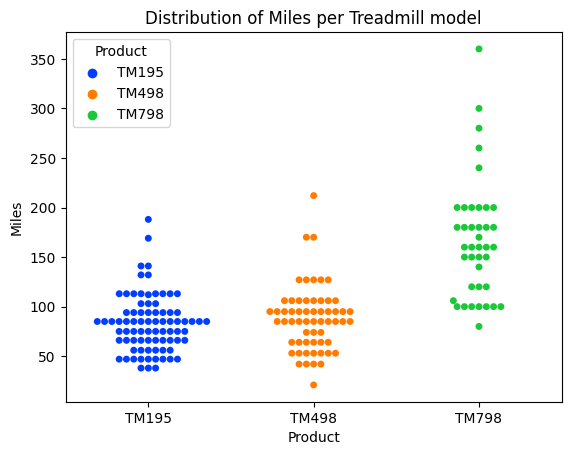

In [74]:
#Using a countplot with different hue for Partnered and Single subgroups
plt.title("Distribution of Miles per Treadmill model")
sns.swarmplot(df, x="Product", y="Miles", hue="Product", palette="bright")
plt.show()

###From the data provided, the following has been observed:
- TM195 is the most popular model of Treadmill
- CardioGood products are most popular for age groups between 24 and 33 years old, being most popular for ages of 25 years old
- Males represent around 58% of the customer base
- Most customers have completed between 14 years and 16 years of education
- Product popularity is higher amongst partnered customers, with around 59% of the customer base being partnered
- Most customers have reported they plan to use the equipment 3 times a week and run between 66 and 115 miles per week, with 85 miles per week being the most common expectation of weekly usage
- Most customers have reported a fitness level of 3
- The median customer income is of $50.5k
- CardioGood TM195 and TM498 are equally as popular between both genders. CardioGood TM798 customers are 5x more likely to be males
- There is a medium correlation between the following variables:
    - Age and Income (0.51)
    - Education and Income (0.62)
    - Usage and Fitness (0.66)
    - Usage and Income (0.52)
    - Fitness and Income (0.53)
    - Income and Miles (0.54)
- There is a strong correlation between the following variables:
    - Usage and Miles (0.76)
    - Fitness and Miles (0.78)

##Final thoughts:
###Popular Products:
- TM195 Dominance: The TM195 treadmill stands out as the most popular model, indicating strong customer preference.

###Target Age Group:
- CardioGood's Appeal: CardioGood products resonate most with customers aged 24 to 33, especially those around 25 years old. Consider tailored marketing strategies for this age demographic.

###Gender Demographics:
- Male Dominance: Currently, males constitute approximately 58% of our customer base, indicating a significant presence. Recognizing the diversity within our customer demographics, there is an opportunity to enhance inclusivity and engagement by strategically tailoring marketing campaigns to appeal to the female cohort. While CardioGood TM195 and TM498 appeal equally to both genders, TM798 customers are notably 5 times more likely to be males. Consider implementing initiatives that resonate with both genders for a more comprehensive and balanced outreach.

###Educational Background:
- Education Levels: The majority of customers have completed 14 to 16 years of education. Educational messaging in marketing materials can be crafted to resonate with this group.

###Relationship Status Impact:
- Partnered Popularity: Products are more popular among partnered customers, constituting around 59% of the customer base. Consider strategies to engage and cater to the partnered segment.

###Usage and Fitness Habits:
- Weekly Habits: Most customers plan to use the equipment 3 times a week, with a common expectation of running between 66 and 115 miles. Fitness level 3 is prevalent. Tailor promotions to align with these common habits.

###Income Distribution:
- Median Income: The median customer income is $50.5k. Consider pricing strategies and promotions aligned with this income bracket.

###Correlation Highlights:
- Moderate Correlations: Moderate correlations suggest connections between age and income, education and income, usage and fitness, usage and income, fitness and income, and income and miles.
- Strong Correlations: Strong correlations highlight the close relationship between usage and miles, as well as fitness and miles. Leverage these insights for targeted marketing approaches.

##In Summary:
###The data suggests a market leaning toward CardioGood products, with the TM195 as a standout model. Focusing marketing efforts on the 24 to 33 age group, particularly males, partnered individuals, and those with 14 to 16 years of education, while considering usage and fitness habits, can enhance campaign effectiveness. Strategic pricing, messaging, and product positioning aligned with income levels can further optimize marketing success. Understanding and leveraging the correlations can inform targeted promotional strategies, catering to the preferences and habits of the customer base.
